In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Insert path to mavenn beginning of path
import os
import sys
# Load mavenn
import sys
path_to_mavenn = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_git_ssh/'
sys.path.insert(0, path_to_mavenn)

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_git_ssh/mavenn']


In [2]:
# Download mpsa dataset from master branch
url = 'https://github.com/jbkinney/mavenn/blob/master/mavenn/examples/datasets/mpsa_data.csv.gz?raw=true'

data_df = pd.read_csv(url,  
                      compression='gzip',
                      index_col=[0])

data_df = data_df.reset_index().copy()

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head(10)

test N: 6,249
training + validation N: 24,234


,set,tot_ct,ex_ct,y,x
0,training,28,2,0.023406,GGAGUGAUG
1,training,315,7,-0.587914,AGUGUGCAA
2,validation,27,0,-0.438475,UAAGCUUUU
3,training,130,2,-0.631467,AUGGUCGGG
4,training,552,19,-0.433012,AGGGCAGGA
5,training,151,184,1.094011,AAGGUCCGC
6,training,88,4,-0.241737,CAGGCAAAC
7,training,105,5,-0.238471,GUGGCAAAU
8,validation,14,0,-0.167408,CAUGCAGCU
9,training,170,14,-0.048222,CAAGUCACU


In [3]:
# Get sequence length
L = len(data_df['x'][0])

# Define model
model = mavenn.Model(L=L,
                     alphabet='rna',
                     gpmap_type='neighbor', 
                     regression_type='GE',
                     theta_regularization=0.1,
                     ge_noise_model_type='SkewedT',
                     ge_heteroskedasticity_order=2)


In [4]:
# Set training data
model.set_data(x=data_df['x'],
               y=data_df['y'],
               validation_flags=(data_df['set']=='validation'),
               shuffle=True)

N = 24,234 observations set as training data.
Using 24.8% for validation.
Data shuffled.
Time to set data: 0.431 sec.


In [5]:
# Fit model to data
model.fit(learning_rate=.001,
          epochs=1000,
          batch_size=200,
          early_stopping=True,
          early_stopping_patience=30,
          linear_initialization=False)

Epoch 1/1000


Using TensorFlow backend.
Exception ignored in: <bound method tqdm.__del__ of <tqdm.auto.tqdm object at 0x7f805cfa3048>>
Traceback (most recent call last):
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/notebook.py", line 289, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


92/92 [==============================] - 3s 14ms/step - loss: 280.8336 - I_var: -0.5429 - val_loss: 255.8343 - val_I_var: -0.4595
Epoch 2/1000
92/92 [==============================] - 0s 3ms/step - loss: 250.1876 - I_var: -0.4009 - val_loss: 238.2110 - val_I_var: -0.3398
Epoch 3/1000
92/92 [==============================] - 0s 3ms/step - loss: 233.1970 - I_var: -0.2797 - val_loss: 223.4828 - val_I_var: -0.2391
Epoch 4/1000
92/92 [==============================] - 0s 3ms/step - loss: 221.4528 - I_var: -0.1896 - val_loss: 210.7345 - val_I_var: -0.1533
Epoch 5/1000
92/92 [==============================] - 0s 3ms/step - loss: 205.7703 - I_var: -0.1023 - val_loss: 200.1942 - val_I_var: -0.0799
Epoch 6/1000
92/92 [==============================] - 0s 4ms/step - loss: 200.7629 - I_var: -0.0461 - val_loss: 193.3773 - val_I_var: -0.0320
Epoch 7/1000
92/92 [==============================] - 0s 3ms/step - loss: 194.6375 - I_var: 0.0043 - val_loss: 189.5238 - val_I_var: -0.0044
Epoch 8/1000
92/92 

92/92 [==============================] - 0s 3ms/step - loss: 164.7748 - I_var: 0.1827 - val_loss: 162.3020 - val_I_var: 0.1893
Epoch 60/1000
92/92 [==============================] - 0s 4ms/step - loss: 168.9072 - I_var: 0.1877 - val_loss: 162.0243 - val_I_var: 0.1912
Epoch 61/1000
92/92 [==============================] - 0s 4ms/step - loss: 166.6568 - I_var: 0.1882 - val_loss: 161.7369 - val_I_var: 0.1928
Epoch 62/1000
92/92 [==============================] - 0s 4ms/step - loss: 164.7939 - I_var: 0.1917 - val_loss: 161.4535 - val_I_var: 0.1948
Epoch 63/1000
92/92 [==============================] - 0s 4ms/step - loss: 165.1312 - I_var: 0.1890 - val_loss: 161.3637 - val_I_var: 0.1956
Epoch 64/1000
92/92 [==============================] - 0s 3ms/step - loss: 162.0964 - I_var: 0.1971 - val_loss: 161.1561 - val_I_var: 0.1981
Epoch 65/1000
92/92 [==============================] - 0s 3ms/step - loss: 162.7664 - I_var: 0.1916 - val_loss: 160.7569 - val_I_var: 0.1998
Epoch 66/1000
92/92 [======

92/92 [==============================] - 0s 3ms/step - loss: 150.2270 - I_var: 0.3024 - val_loss: 145.1588 - val_I_var: 0.3147
Epoch 118/1000
92/92 [==============================] - 0s 3ms/step - loss: 148.5803 - I_var: 0.2829 - val_loss: 145.7732 - val_I_var: 0.3105
Epoch 119/1000
92/92 [==============================] - 0s 3ms/step - loss: 149.7889 - I_var: 0.3078 - val_loss: 146.7777 - val_I_var: 0.3037
Epoch 120/1000
92/92 [==============================] - 0s 3ms/step - loss: 150.8558 - I_var: 0.2975 - val_loss: 146.6755 - val_I_var: 0.3048
Epoch 121/1000
92/92 [==============================] - 0s 3ms/step - loss: 149.8698 - I_var: 0.2982 - val_loss: 146.4226 - val_I_var: 0.3056
Epoch 122/1000
92/92 [==============================] - 0s 3ms/step - loss: 151.8993 - I_var: 0.2919 - val_loss: 152.2216 - val_I_var: 0.2665
Epoch 123/1000
92/92 [==============================] - 0s 4ms/step - loss: 147.0120 - I_var: 0.3131 - val_loss: 148.3942 - val_I_var: 0.2920
Epoch 124/1000
92/92 

In [6]:
# Save model
model.save('mpsa_ge_neighbor')

Model saved to these files:
	mpsa_ge_neighbor.pickle
	mpsa_ge_neighbor.h5


In [7]:
# Load model
model = mavenn.load('mpsa_ge_neighbor')

Model loaded from these files:
	mpsa_ge_neighbor.pickle
	mpsa_ge_neighbor.h5


In [8]:
# Get x and y
x_test = test_df['x'].values
y_test = test_df['y'].values

On test data:
I_var_test: 0.333 +- 0.032 bits
I_pred_test: 0.338 +- 0.013 bits


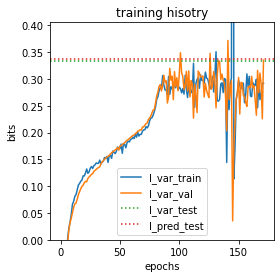

In [9]:
# Show training history
print('On test data:')

# Compute variational information
I_var, dI_var =  model.I_variational(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
ax.set_ylim([0, I_pred*1.2]);

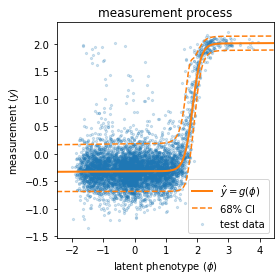

In [10]:
# Predict latent phentoype values (phi) on test data
phi_test = model.x_to_phi(x_test)

# Predict measurement values (yhat) on test data
yhat_test = model.x_to_yhat(x_test)

# Set phi lims and create grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 90% CI for each yhat
q = [0.05, 0.95] #[0.16, 0.84]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Create figure
fig, ax = plt.subplots(1, 1, figsize=[4, 4])

# Illustrate measurement process with GE curve
ax.scatter(phi_test, y_test, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1', label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('measurement process')
ax.legend()

# Fix up plot
fig.tight_layout()
plt.show()